In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import dates
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('health.csv')
df.colums = ['date','click']
df

C:\Users\user\AppData\Local\Temp\ipykernel_2684\152790976.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = ['date','click']


,Date,Click
0,2019-01-01,36
1,2019-01-02,45
2,2019-01-03,41
3,2019-01-04,40
4,2019-01-05,40
...,...,...
360,2019-12-27,86
361,2019-12-28,80
362,2019-12-29,87
363,2019-12-30,88


# 시계열 데이터의 조건
- 1년이상 수집(계절성을 반영하기 위함)
- 일정한 간격으로 빠짐없이 데이터가 수집되어야 함
- 선형성 전제[선형성, 독립성,등분산성,정규성]

In [9]:
df['Click'].isnull().sum()

0

In [15]:
print(type(df['Date'][0]))
df['Date'] = pd.to_datetime(df['Date'])
print(type(df['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [17]:
df['Date'][1] - df['Date'][0]     # timedelta는 시간을 계산

Timedelta('1 days 00:00:00')

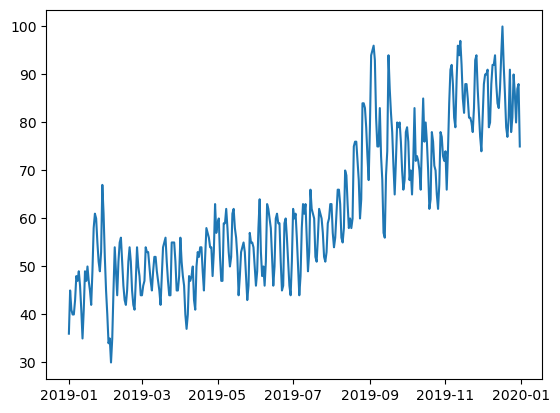

In [19]:
plt.plot(df['Date'],df['Click'])

In [21]:
x = range(len(df['Date']))
y = df['Click']

x = sm.add_constant(x)
model = sm.OLS(y,x)          # OLS = 회귀분석
result = model.fit()
print(result.params)

const    39.057534
x1        0.126554
dtype: float64


In [24]:
# y절편
a = result.params[0]

#기울기
b = result.params[1]

In [39]:
df1 = df.copy()
df1['Date'] = range(len(df1))
df1['prediction'] = df1['Date'].apply(lambda x : b*x+a)
df1

,Date,Click,prediction
0,0,36,39.057534
1,1,45,39.184089
2,2,41,39.310643
3,3,40,39.437197
4,4,40,39.563751
...,...,...,...
360,360,86,84.617071
361,361,80,84.743625
362,362,87,84.870179
363,363,88,84.996733


In [36]:
df["prediction"] = [b * x + a for x in range(len(df["Date"]))]

In [33]:
prediction = []
for x in range(len(df["Date"])):
      prediction.append (b * x + a)
df['prediction'] = prediction
df

,Date,Click,prediction
0,2019-01-01,36,39.057534
1,2019-01-02,45,39.184089
2,2019-01-03,41,39.310643
3,2019-01-04,40,39.437197
4,2019-01-05,40,39.563751
...,...,...,...
360,2019-12-27,86,84.617071
361,2019-12-28,80,84.743625
362,2019-12-29,87,84.870179
363,2019-12-30,88,84.996733


<AxesSubplot:xlabel='Date'>

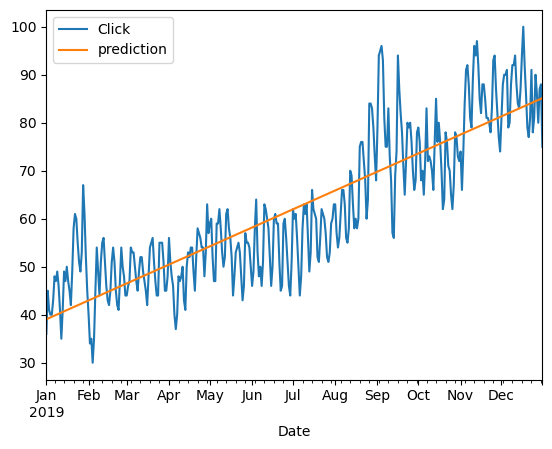

In [43]:
df.plot(x = 'Date',y=['Click','prediction'])

In [44]:
mse = []
for a, i in enumerate(df["Click"]):
    mse.append((i-df['prediction'][a])**2)
np.mean(mse)

64.7166329373385

In [46]:
# 0 = 일요일, 1 = 월요일, 2 = 화요일
yoil = [2, 3, 4, 5, 6, 0, 1]
season = []
for i in range(len(df['Click'])//len(yoil)):
    for w in yoil:
        season.append(w)
season.append(2)
len(season)

365

In [47]:
df['season'] = season
df

,Date,Click,prediction,season
0,2019-01-01,36,39.057534,2
1,2019-01-02,45,39.184089,3
2,2019-01-03,41,39.310643,4
3,2019-01-04,40,39.437197,5
4,2019-01-05,40,39.563751,6
...,...,...,...,...
360,2019-12-27,86,84.617071,5
361,2019-12-28,80,84.743625,6
362,2019-12-29,87,84.870179,0
363,2019-12-30,88,84.996733,1


In [48]:
df['trend'] = df.index
df

,Date,Click,prediction,season,trend
0,2019-01-01,36,39.057534,2,0
1,2019-01-02,45,39.184089,3,1
2,2019-01-03,41,39.310643,4,2
3,2019-01-04,40,39.437197,5,3
4,2019-01-05,40,39.563751,6,4
...,...,...,...,...,...
360,2019-12-27,86,84.617071,5,360
361,2019-12-28,80,84.743625,6,361
362,2019-12-29,87,84.870179,0,362
363,2019-12-30,88,84.996733,1,363


In [50]:
x = df[['season','trend']]
y = df['Click']

x = sm.add_constant(x)
model = sm.OLS(y,x)          # OLS = 회귀분석
result = model.fit()
print(result.params)

const     42.960569
season    -1.291633
trend      0.126380
dtype: float64


<AxesSubplot:xlabel='Date'>

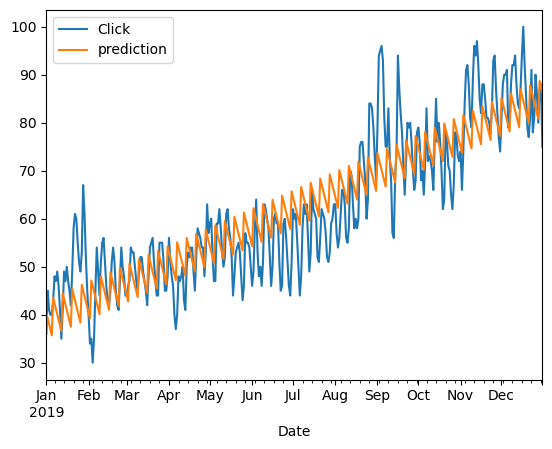

In [51]:
# y 절편
a = result.params[0]

# season 계수
b1 = result.params[1]

# trend 계수
b2 = result.params[2]

prediction = []
for i in range(len(df["Date"])):
    prediction.append(b1 * df['season'][i] + b2 * df['trend'][i] + a)
df['prediction'] = prediction

df.plot(x = 'Date', y = ['Click','prediction'])

In [55]:
mse = []
for a,i in enumerate(df['Click']):
    mse.append((i- df['prediction'][a])**2)
np.mean(mse) 

58.05742898051807

In [ ]:
df= pd.read_csv('LGSS.csv')
df.columns = ["date","lg","samsung"]
df

<AxesSubplot:xlabel='date'>

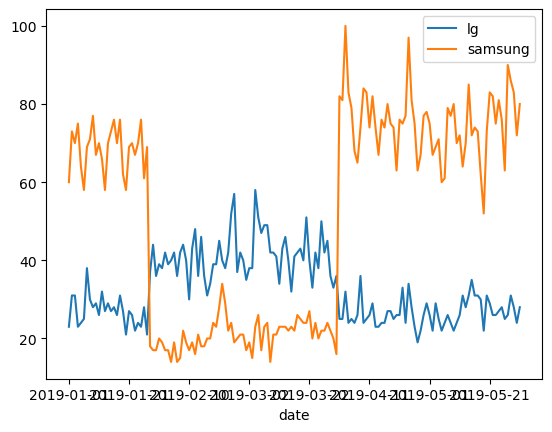

In [59]:
df.plot(x="date", y = ["lg", "samsung"])

In [60]:
x = range(len(df['date']))
y = df['samsung']

x = sm.add_constant(x)
model = sm.OLS(y,x)          # OLS = 회귀분석
result = model.fit()
print(result.params)

const    32.974904
x1        0.243778
dtype: float64


In [62]:
# y절편
a = result.params[0]

#기울기
b = result.params[1]

In [63]:
prediction = []
for x in range(len(df["date"])):
      prediction.append (b * x + a)
df['prediction'] = prediction
df

,date,lg,samsung,prediction
0,2019-01-01,23,60,32.974904
1,2019-01-02,31,73,33.218682
2,2019-01-03,31,70,33.462461
3,2019-01-04,23,75,33.706239
4,2019-01-05,24,64,33.950017
...,...,...,...,...
146,2019-05-27,26,90,68.566539
147,2019-05-28,31,86,68.810317
148,2019-05-29,28,83,69.054096
149,2019-05-30,24,72,69.297874


<AxesSubplot:xlabel='date'>

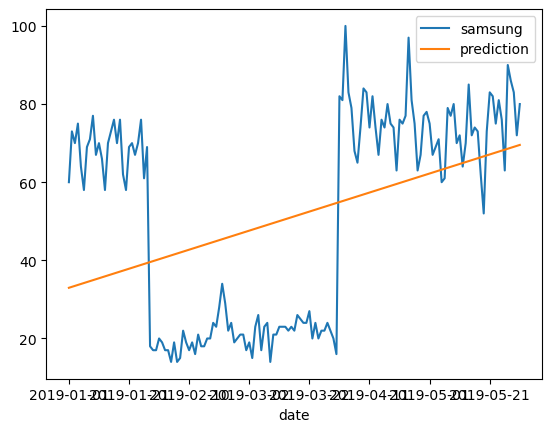

In [65]:
df.plot(x = "date", y = ["samsung", "prediction"])

In [67]:
before = df.iloc[:27]
after = df.iloc[90:]
left = df.iloc[27:90]       # 1월 29일부터 3월 31일까지 무슨 일이 있었다!

In [69]:
right = pd.concat([before, after], axis=0)
right

,date,lg,samsung,prediction
0,2019-01-01,23,60,32.974904
1,2019-01-02,31,73,33.218682
2,2019-01-03,31,70,33.462461
3,2019-01-04,23,75,33.706239
4,2019-01-05,24,64,33.950017
...,...,...,...,...
146,2019-05-27,26,90,68.566539
147,2019-05-28,31,86,68.810317
148,2019-05-29,28,83,69.054096
149,2019-05-30,24,72,69.297874


In [70]:
x = right.index
y = right.samsung

x = sm.add_constant(x)
model = sm.OLS(y,x)          # OLS = 회귀분석
result = model.fit()
print(result.params)

const    68.427246
x1        0.052718
dtype: float64


In [71]:
# y절편
a = result.params[0]

#기울기
b = result.params[1]

prediction = []
for x in right.index:
      prediction.append (b * x + a)
right['prediction'] = prediction
right

,date,lg,samsung,prediction
0,2019-01-01,23,60,68.427246
1,2019-01-02,31,73,68.479964
2,2019-01-03,31,70,68.532683
3,2019-01-04,23,75,68.585401
4,2019-01-05,24,64,68.638119
...,...,...,...,...
146,2019-05-27,26,90,76.124123
147,2019-05-28,31,86,76.176841
148,2019-05-29,28,83,76.229560
149,2019-05-30,24,72,76.282278


In [72]:
x = left.index
y = left.samsung

x = sm.add_constant(x)
model = sm.OLS(y,x)          # OLS = 회귀분석
result = model.fit()
print(result.params)

const    16.149098
x1        0.081173
dtype: float64


In [73]:
# y절편
a = result.params[0]

#기울기
b = result.params[1]

prediction = []
for x in left.index:
      prediction.append (b * x + a)
left['prediction'] = prediction
left

C:\Users\user\AppData\Local\Temp\ipykernel_2684\2526287120.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left['prediction'] = prediction


,date,lg,samsung,prediction
27,2019-01-28,37,18,18.340774
28,2019-01-29,44,17,18.421947
29,2019-01-30,36,17,18.503120
30,2019-01-31,39,20,18.584293
31,2019-02-01,38,19,18.665467
...,...,...,...,...
85,2019-03-27,42,22,23.048819
86,2019-03-28,45,24,23.129992
87,2019-03-29,36,22,23.211166
88,2019-03-30,33,20,23.292339


In [76]:
df2 = pd.concat([right.iloc[:27], left , right.iloc[27:]], axis = 0)
df2

,date,lg,samsung,prediction
0,2019-01-01,23,60,68.427246
1,2019-01-02,31,73,68.479964
2,2019-01-03,31,70,68.532683
3,2019-01-04,23,75,68.585401
4,2019-01-05,24,64,68.638119
...,...,...,...,...
146,2019-05-27,26,90,76.124123
147,2019-05-28,31,86,76.176841
148,2019-05-29,28,83,76.229560
149,2019-05-30,24,72,76.282278


<AxesSubplot:xlabel='date'>

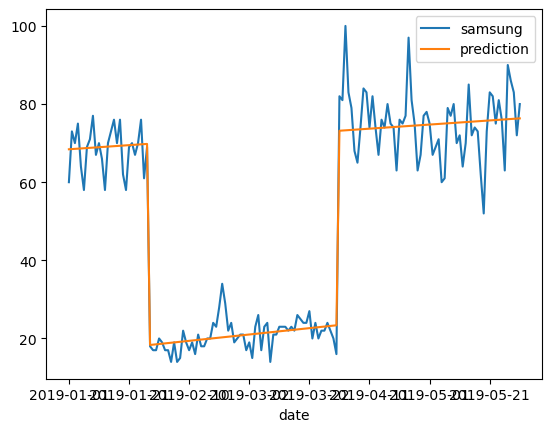

In [77]:
df2.plot(x = "date", y = ["samsung", "prediction"])

In [78]:
df= pd.read_csv('LGSS.csv')
df.columns = ["date","lg","samsung"]
df

,date,lg,samsung
0,2019-01-01,23,60
1,2019-01-02,31,73
2,2019-01-03,31,70
3,2019-01-04,23,75
4,2019-01-05,24,64
...,...,...,...
146,2019-05-27,26,90
147,2019-05-28,31,86
148,2019-05-29,28,83
149,2019-05-30,24,72


In [82]:
moderator = []
for i in range(27):
    moderator.append(0)
for i in range(90-27):
    moderator.append(1)
for i in range(151-90):
    moderator.append(0)
len(moderator)

151

In [85]:
df['interruption'] = moderator
df

,date,lg,samsung,interruptoin,interruption
0,2019-01-01,23,60,0,0
1,2019-01-02,31,73,0,0
2,2019-01-03,31,70,0,0
3,2019-01-04,23,75,0,0
4,2019-01-05,24,64,0,0
...,...,...,...,...,...
146,2019-05-27,26,90,0,0
147,2019-05-28,31,86,0,0
148,2019-05-29,28,83,0,0
149,2019-05-30,24,72,0,0


In [87]:
df['trend'] = df.index

In [105]:
df['interaction'] = df["trend"] * df['interruption']
df

,date,lg,samsung,interruptoin,interruption,interaction,trend,prediction,mse
0,2019-01-01,23,60,0,0,0,0,68.749739,76.557925
1,2019-01-02,31,73,0,0,0,1,68.798757,17.650440
2,2019-01-03,31,70,0,0,0,2,68.847776,1.327620
3,2019-01-04,23,75,0,0,0,3,68.896795,37.249113
4,2019-01-05,24,64,0,0,0,4,68.945814,24.461072
...,...,...,...,...,...,...,...,...,...
146,2019-05-27,26,90,0,0,0,146,75.906479,198.627323
147,2019-05-28,31,86,0,0,0,147,75.955498,100.892017
148,2019-05-29,28,83,0,0,0,148,76.004517,48.936783
149,2019-05-30,24,72,0,0,0,149,76.053536,16.431152


In [106]:
x = df [['trend','interruption','interaction']]
y = df['samsung']

x = sm.add_constant(x)
model = sm.OLS(y,x)          # OLS = 회귀분석
result = model.fit()
print(result.params)

const           68.427246
trend            0.052718
interruption   -52.278149
interaction      0.028455
dtype: float64


In [107]:
# y절편
a = result.params[0]

# 기울기
b1 = result.params[1]

# 조절항
b2 = result.params[2]

# 상호작용항
b3 = result.params[3]

prediction = []
for i in df.index:
    prediction.append(b1 * df["trend"][i] + b2 * df["interruption"][i]+ b3 * df["interaction"][i] + a)
df["prediction"] = prediction
df

,date,lg,samsung,interruptoin,interruption,interaction,trend,prediction,mse
0,2019-01-01,23,60,0,0,0,0,68.427246,76.557925
1,2019-01-02,31,73,0,0,0,1,68.479964,17.650440
2,2019-01-03,31,70,0,0,0,2,68.532683,1.327620
3,2019-01-04,23,75,0,0,0,3,68.585401,37.249113
4,2019-01-05,24,64,0,0,0,4,68.638119,24.461072
...,...,...,...,...,...,...,...,...,...
146,2019-05-27,26,90,0,0,0,146,76.124123,198.627323
147,2019-05-28,31,86,0,0,0,147,76.176841,100.892017
148,2019-05-29,28,83,0,0,0,148,76.229560,48.936783
149,2019-05-30,24,72,0,0,0,149,76.282278,16.431152


<AxesSubplot:xlabel='date'>

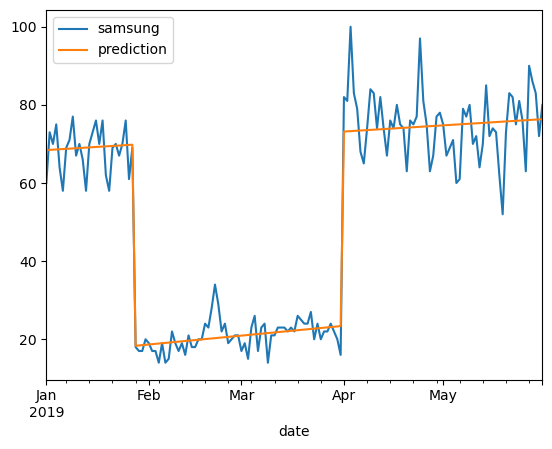

In [108]:
df.plot (x ='date' ,y=['samsung','prediction'])

In [109]:
mse = []
for a, i in enumerate(df['samsung']):
    mse.append((i-df['prediction'][a])**2)
np.mean(mse)

41.69384068570683

In [110]:
df['mse'] = mse

In [112]:
df['date'] = pd.to_datetime(df['date'])

<AxesSubplot:xlabel='date'>

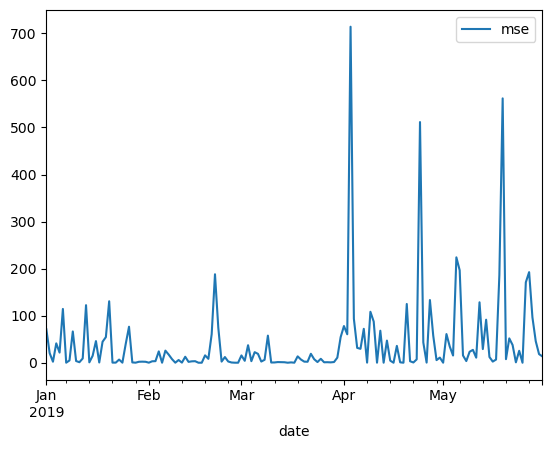

In [119]:
df.plot(x= 'date',y='mse')

<AxesSubplot:xlabel='date'>

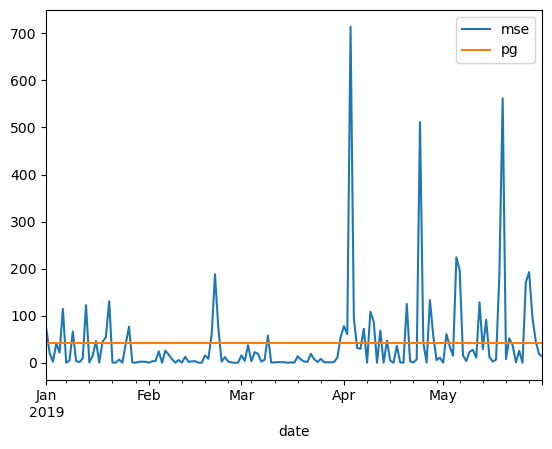

In [115]:
pg = np.mean(mse)
df['pg'] = pg
df.plot(x='date', y =['mse','pg'])

<AxesSubplot:xlabel='date'>

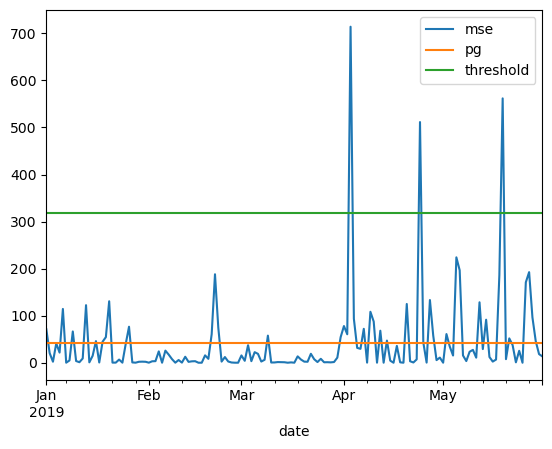

In [123]:
threshold = pg + np.std(mse) * 3
df['threshold'] = threshold
df.plot(x='date', y =['mse','pg','threshold'])

In [124]:
for a, i in enumerate(mse):
    if i > threshold:
        print(a)

92
113
138


In [127]:
print(df.iloc[92]['date'])
print(df.iloc[113]['date'])
print(df.iloc[138]['date'])

2019-04-03 00:00:00
2019-04-24 00:00:00
2019-05-19 00:00:00


- 2019년 4월 3 일 삼성 라이온즈가 연패를 끊었다.
- 2019년 4 월 24일 비메모리 반도체 133조원 투자
- 2019년 5월 19일 삼성 바이로직스 분식회계